# Overview

## Hang on, don't optimise too early
- Trade-offs e.g. complexity, speed, memory, disk, readability, time, effort, etc.
    - Check that code is correct (tested, documented).
    - Is optimisation needed?
    - If yes, optimise code and data.
    - If more needed, parallelise.  

*Plot idea from [Dask-ML](https://ml.dask.org/).*

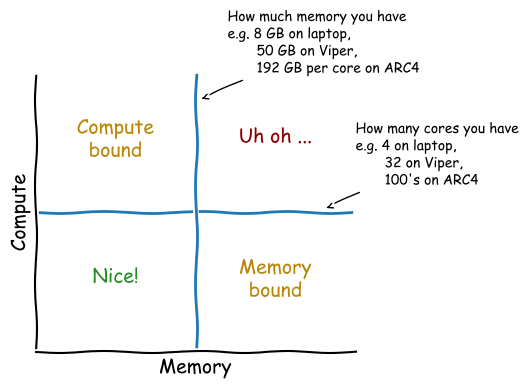

In [1]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])
    plt.axhline(y=0.5, linestyle='-')
    plt.axvline(x=0.5, linestyle='-')
    ax.annotate('Compute\nbound', xy=(0.25, 0.7), ha='center', color='darkgoldenrod')
    ax.annotate('Memory\nbound', xy=(0.75, 0.2), ha='center', color='darkgoldenrod')
    ax.annotate('Nice!', xy=(0.25, 0.25), ha='center', color='forestgreen')
    ax.annotate('Uh oh ...', xy=(0.75, 0.75), ha='center', color='darkred')
    ax.annotate(
        "How many cores you have\ne.g. 4 on laptop,\n       32 on Viper,\n       100's on ARC4",
        arrowprops=dict(arrowstyle='->'),
        xy=(0.9, 0.51),
        xytext=(1, 0.6),
        fontsize=10
    )
    ax.annotate(
        "How much memory you have\ne.g. 8 GB on laptop,\n       50 GB on Viper,\n       192 GB per core on ARC4",
        arrowprops=dict(arrowstyle='->'),
        xy=(0.51, 0.9),
        xytext=(0.6, 1),
        fontsize=10
    )
    ax.set_xlabel('Memory')
    ax.set_ylabel('Compute')
    plt.show()

## How fast could it go?

- Time-space complexity
  - [Big O notation](https://www.bigocheatsheet.com/) where O is the order of operations, O(...).
  - Ignores constants and takes the largest order, so O(2n<sup>2</sup> + 3n) would be O(n<sup>2</sup>).
  - Important for large number of elements, N.
  - Typical case.
  - Constant time means per machine operation.
  
*Plot idea from [Big O Cheat Sheet](https://www.bigocheatsheet.com/)*.  

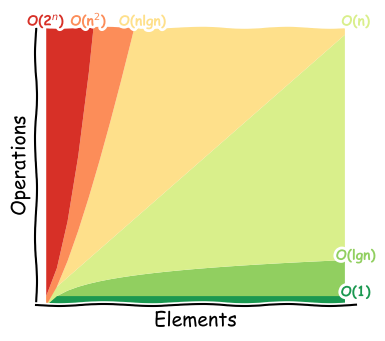

In [2]:
max_value = 30
elements = np.arange(1, max_value)

with plt.xkcd():
    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, max_value])
    ax.set_xlim([0, max_value])
    ax.set_xlabel('Elements')
    ax.set_ylabel('Operations')
    
    complexities = ['O(1)', 'O(lgn)', 'O(n)', 'O(nlgn)', 'O(n$^2$)', 'O(2$^n$)']
    colours = list(reversed(['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']))
    x_values = [max_value, max_value, max_value, max_value / 3, max_value / 6, max_value / max_value]
    y_values = [max_value / max_value, np.log2(max_value), max_value, max_value, max_value, max_value]
    y_lows = [0, 1, np.log2(elements), elements, elements * np.log2(elements), elements ** 2]
    y_highs = [1, np.log2(elements), elements, elements * np.log2(elements), elements ** 2, max_value]
    
    for index, complexity in enumerate(complexities):
        plt.fill_between(elements, y_lows[index], y_highs[index], facecolor=colours[index])
        ax.annotate(complexity, xy=(x_values[index], y_values[index]), ha='center', color=colours[index], fontsize=10, weight='bold')
    
    plt.show()